# **Health and Wellness** (CMSE 202 Project)

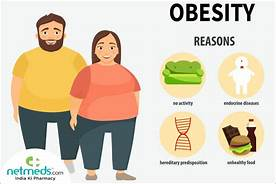

#### By: Deeya Patel, Shreyas Athreya, and Atticus Bartoli

## **Question**: 
What factors impact obesity the most? How do different strategies to alleviate obesity compare?

## **Data:**

***Source:***

Kaggle: https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels?resource=download&select=ObesityDataSet_raw_and_data_sinthetic.csv

In [1]:
import pandas as pd

obesity_df = pd.read_csv('Obesity_Data.csv', delimiter=',')
obesity_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


***What does the data show?*** 
* The data provides demographic information as well as lifestyle choices of a large sample of people from which we can pull information on what factors influence obesity the most. Further, we can then then find ways to alleviate obesity based on that information.

***Defining Variables:***
* Frequent consumption of high caloric foods (FAVC)
* Frequency of consumption of vegetables (FCVC)
* Number of main meals (NCP)
* Consumption of food between meals (CAEC)
* Consumption of water daily (CH20)
* Calories consumption monitoring (SCC)
* Physical activity frequency (FAF)
* Time using technology devices (TUE)
* Consumption of alcohol (CALC)
* Transportation used (MTRANS)
* NObeyesdad is to indicate the Weight Classification

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
obesity_df = pd.read_csv('Obesity_Data.csv')

# Step 2: Define features and target variable
X = obesity_df.drop(columns=['NObeyesdad'])
y = obesity_df['NObeyesdad']

# Step 3: Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 6: Evaluate model performance
train_accuracy = accuracy_score(y_train, rf_classifier.predict(X_train))
test_accuracy = accuracy_score(y_test, rf_classifier.predict(X_test))

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Step 7: Compare different strategies for alleviating obesity
# Implement different interventions or strategies and evaluate their impact on obesity using appropriate metrics.


Training Accuracy: 1.0
Testing Accuracy: 0.9314420803782506


In [3]:
# Step 7: Compare different strategies for alleviating obesity

# Define subsets for different dietary interventions
low_carb_df = obesity_df[obesity_df['CAEC'] == 'no']
low_fat_df = obesity_df[obesity_df['CAEC'] != 'no']

# Preprocess the subsets
X_low_carb = pd.get_dummies(low_carb_df.drop(columns=['NObeyesdad']))
y_low_carb = low_carb_df['NObeyesdad']

X_low_fat = pd.get_dummies(low_fat_df.drop(columns=['NObeyesdad']))
y_low_fat = low_fat_df['NObeyesdad']

# Split data into training and testing sets for both subsets
X_train_lc, X_test_lc, y_train_lc, y_test_lc = train_test_split(X_low_carb, y_low_carb, test_size=0.2, random_state=42)
X_train_lf, X_test_lf, y_train_lf, y_test_lf = train_test_split(X_low_fat, y_low_fat, test_size=0.2, random_state=42)

# Train Random Forest classifiers for both subsets
rf_classifier_lc = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_lc.fit(X_train_lc, y_train_lc)

rf_classifier_lf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_lf.fit(X_train_lf, y_train_lf)

# Evaluate model performance for both subsets
train_accuracy_lc = accuracy_score(y_train_lc, rf_classifier_lc.predict(X_train_lc))
test_accuracy_lc = accuracy_score(y_test_lc, rf_classifier_lc.predict(X_test_lc))

train_accuracy_lf = accuracy_score(y_train_lf, rf_classifier_lf.predict(X_train_lf))
test_accuracy_lf = accuracy_score(y_test_lf, rf_classifier_lf.predict(X_test_lf))

print("Low Carb Diet - Training Accuracy:", train_accuracy_lc)
print("Low Carb Diet - Testing Accuracy:", test_accuracy_lc)

print("Low Fat Diet - Training Accuracy:", train_accuracy_lf)
print("Low Fat Diet - Testing Accuracy:", test_accuracy_lf)


Low Carb Diet - Training Accuracy: 1.0
Low Carb Diet - Testing Accuracy: 0.8181818181818182
Low Fat Diet - Training Accuracy: 1.0
Low Fat Diet - Testing Accuracy: 0.9441747572815534


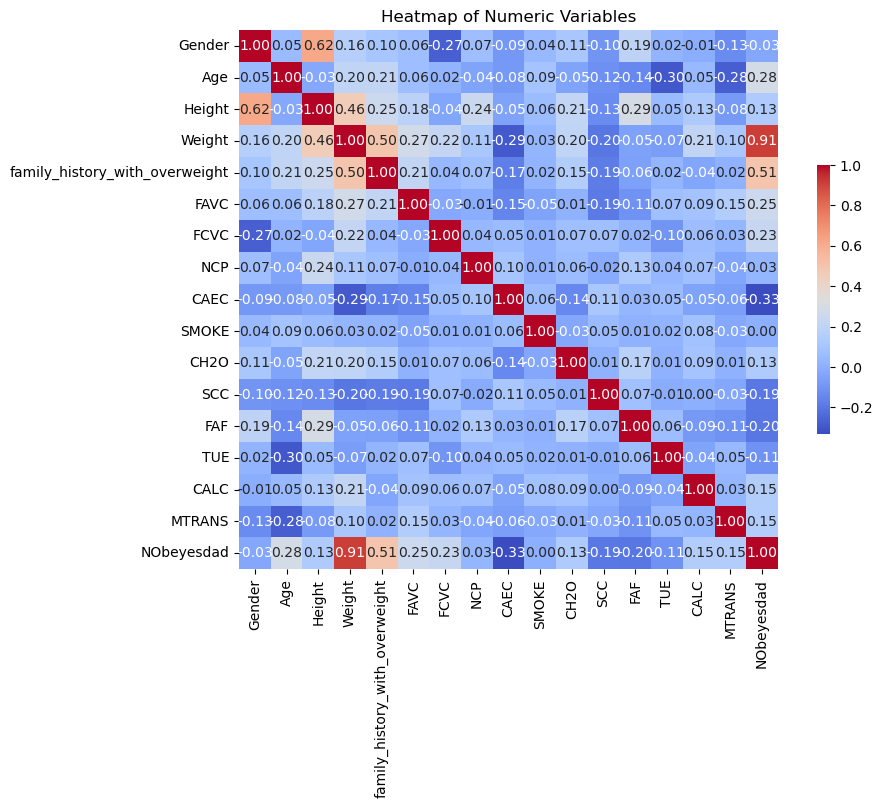

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

obesity_df1 = obesity_df

#unique_nobeyesdad_entries = obesity_df['NObeyesdad'].unique()
#unique_nobeyesdad_entries

columns_to_convert = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
columns_to_convert1 = ['CAEC', 'CALC']
obesity_df1[columns_to_convert] = obesity_df1[columns_to_convert].replace({'yes': 1.0, 'no': 0.0})
obesity_df1['Gender'] = obesity_df1['Gender'].replace({'Male': 1.0, 'Female': 0.0})
obesity_df1[columns_to_convert1] = obesity_df1[columns_to_convert1].replace({'Always': 1.0, 'Frequently': 0.67, 'Sometimes': 0.33, 'no': 0.0})
obesity_df1['MTRANS'] = obesity_df1['MTRANS'].replace({'Public_Transportation': 1, 'Automobile': 0.75, 'Motorbike': 0.5, 'Bike': 0.25, 'Walking': 0.0})
obesity_df1['NObeyesdad'] = obesity_df1['NObeyesdad'].replace({'Obesity_Type_III': 1.0, 'Obesity_Type_II': 0.8333, 'Obesity_Type_I': 0.6666, 'Overweight_Level_II': 0.5, 'Overweight_Level_I': 0.3333, 'Normal_Weight': 0.1666, 'Insufficient_Weight': 0.0})

obesity_df_clean = obesity_df1.dropna()
corr = obesity_df_clean.corr() 

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})
plt.title('Heatmap of Numeric Variables')
plt.show()

#Significant variables for classification of weight are (above 0.2) : Age, *Family History, FAVC, FCVC, CAEC, FAF
#Significant variables for numerical weight are (above 0.2) : Age, *Height, *Family History, FAVC, FCVC, CAEC, CH20, SCC, CALC

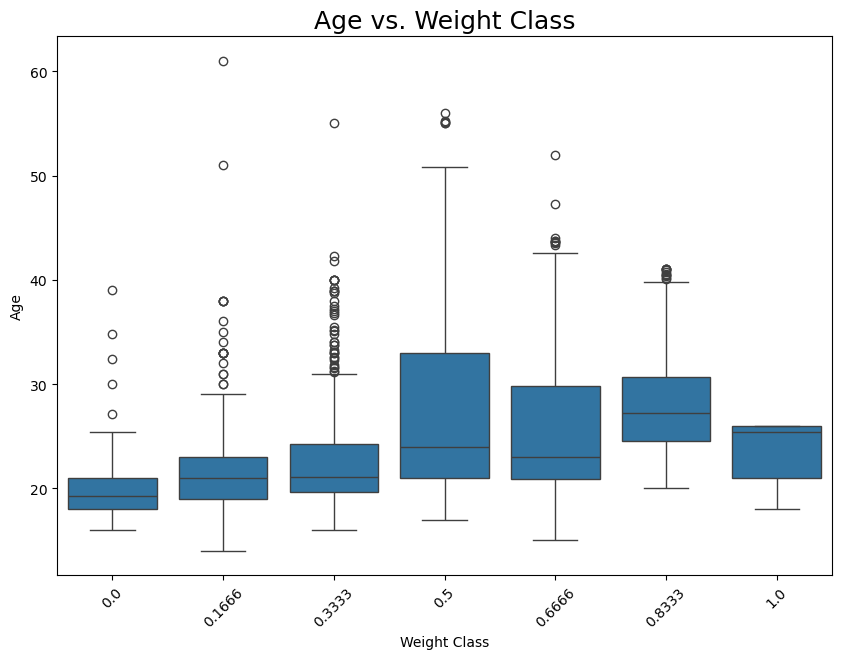

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.boxplot(x='NObeyesdad', y='Age', data=obesity_df)
plt.title('Age vs. Weight Class',fontsize = 18)
plt.xlabel('Weight Class')
plt.xticks(rotation=45) 
plt.show()


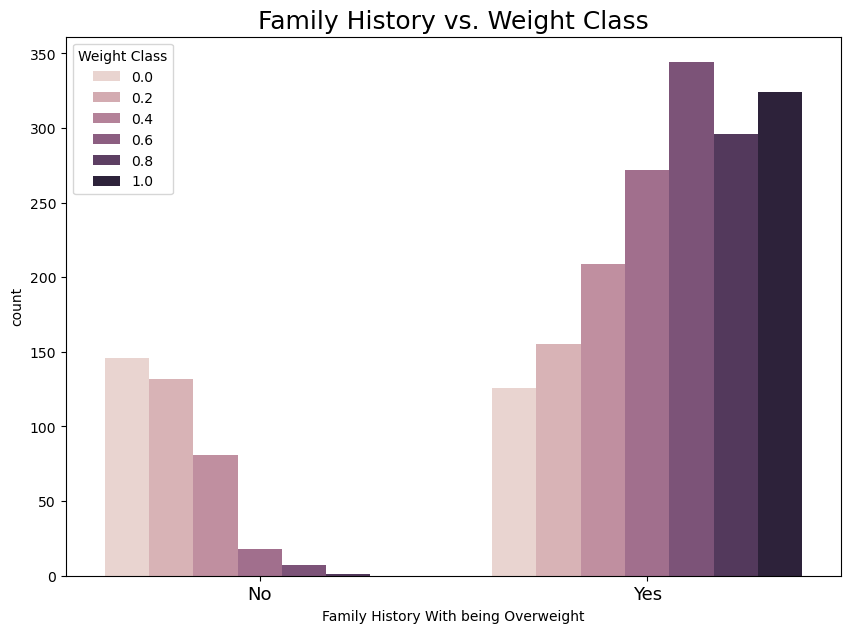

In [6]:
labels = ['No','Yes']
x = [0, 1]

plt.figure(figsize=(10, 7))
sns.countplot(x='family_history_with_overweight', hue='NObeyesdad', data=obesity_df)
plt.title('Family History vs. Weight Class',fontsize = 18)
plt.legend(title='Weight Class')
plt.xlabel('Family History With being Overweight')
plt.xticks(x, labels, fontsize = 13)
plt.show()


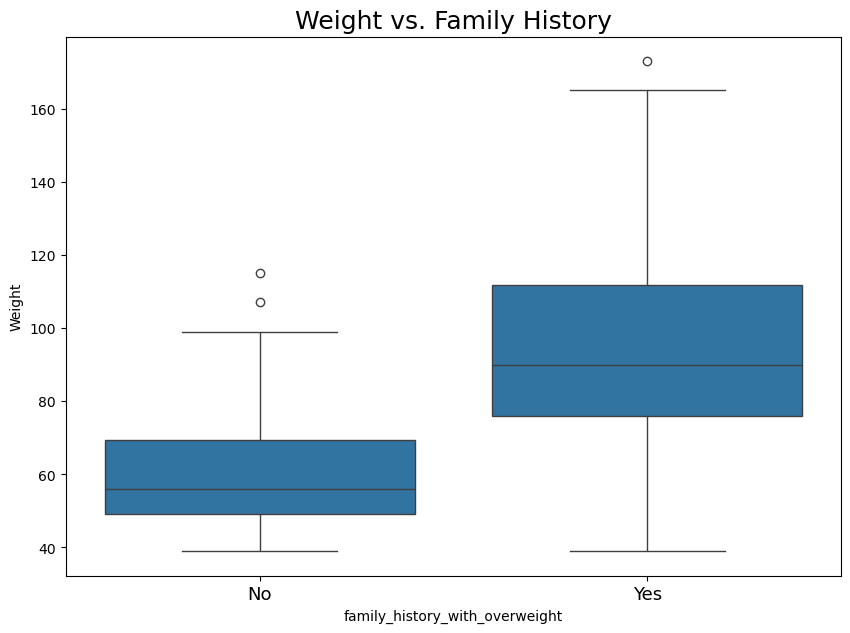

In [7]:
labels1 = ['No','Yes']
x = [0, 1]

plt.figure(figsize=(10, 7))
sns.boxplot(x='family_history_with_overweight', y='Weight', data=obesity_df)
plt.title('Weight vs. Family History',fontsize = 18)
plt.xticks(x, labels1,fontsize = 13)
plt.show()


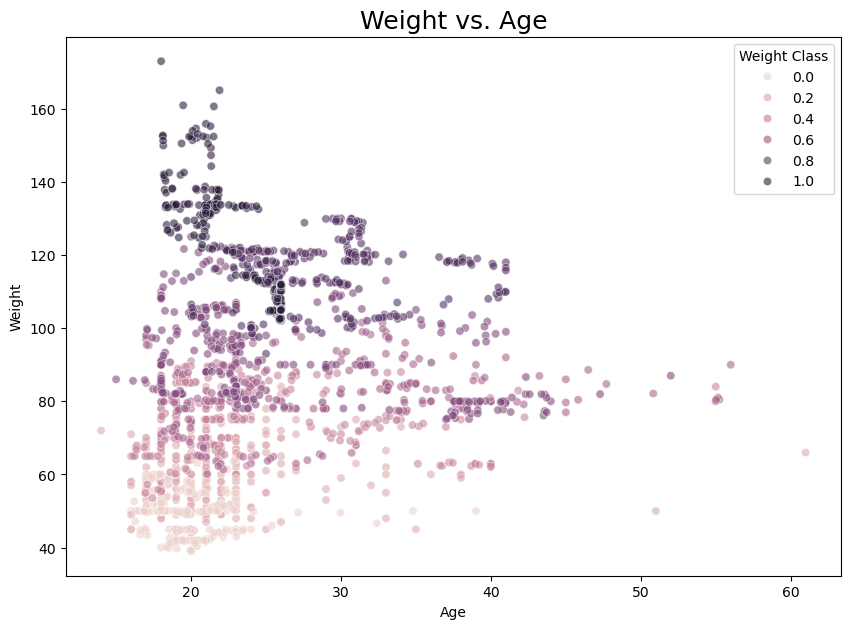

In [8]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Weight', data=obesity_df, hue='NObeyesdad', alpha=0.6)
plt.title('Weight vs. Age',fontsize = 18)
plt.legend(title='Weight Class')
plt.show()


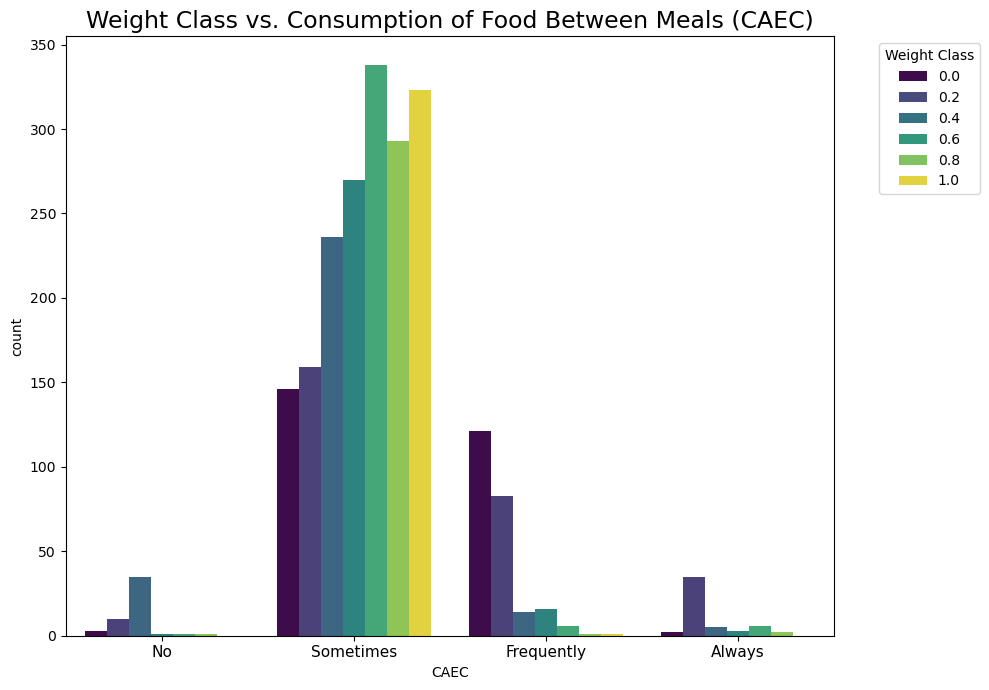

In [9]:
# Using bbox_to_anchor https://stackoverflow.com/questions/25068384/bbox-to-anchor-and-loc-in-matplotlib
labels5 = ['No','Sometimes','Frequently','Always']
x = [0, 1, 2, 3]

plt.figure(figsize=(10, 7))
sns.countplot(x='CAEC', hue='NObeyesdad', data=obesity_df, palette='viridis')
plt.title('Weight Class vs. Consumption of Food Between Meals (CAEC)',fontsize = 17)
plt.xticks(x, labels5,fontsize = 11 )
plt.legend(title='Weight Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


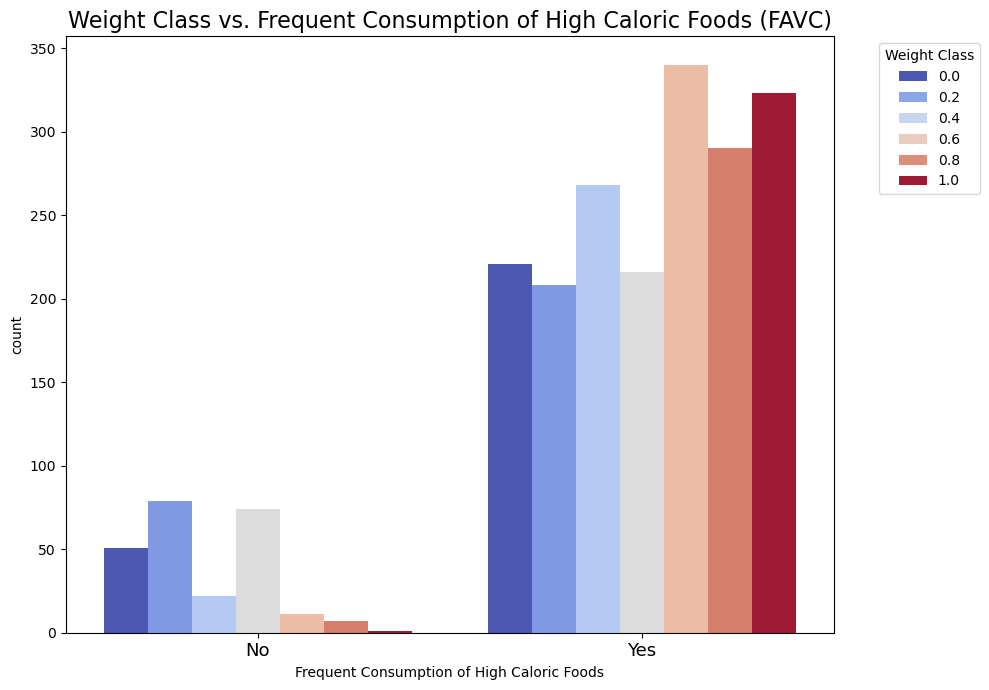

In [10]:
labels2 = ['No','Yes']
x = [0, 1]

plt.figure(figsize=(10, 7))
sns.countplot(x='FAVC', hue='NObeyesdad', data=obesity_df, palette='coolwarm')
plt.title('Weight Class vs. Frequent Consumption of High Caloric Foods (FAVC)',fontsize = 16)
plt.xticks(x, labels2, fontsize = 13)
plt.legend(title='Weight Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Frequent Consumption of High Caloric Foods')
plt.tight_layout()
plt.show()


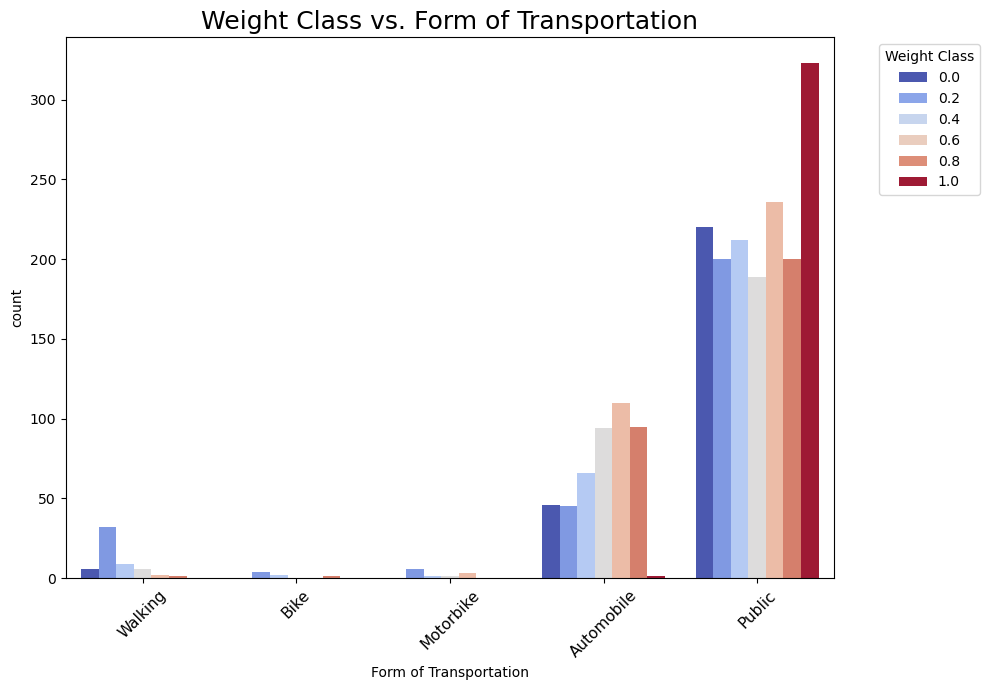

In [12]:
labels3 = ['Walking','Bike','Motorbike','Automobile','Public']
x = [0, 1, 2, 3, 4]

plt.figure(figsize=(10, 7))
sns.countplot(x='MTRANS', hue='NObeyesdad', data=obesity_df, palette='coolwarm')
plt.title('Weight Class vs. Form of Transportation',fontsize = 18)
plt.xticks(rotation=45)
plt.legend(title='Weight Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(x, labels3, fontsize = 11)
plt.xlabel('Form of Transportation')
plt.tight_layout()
plt.show()